In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

preprocessed_train_path = "C:\\Users\\fabio\\Downloads\\ETH\ML4H\Project\\Part 1\\preprocessed_heart_train_val.csv"
preprocessed_path = preprocessed_train_path.replace("\\" , "/")
df_train = pd.read_csv(preprocessed_path)

preprocessed_test_path = "C:\\Users\\fabio\\Downloads\\ETH\ML4H\Project\\Part 1\\preprocessed_heart_test.csv"
preprocessed_test_path = preprocessed_path.replace("\\" , "/")
df_test = pd.read_csv(preprocessed_test_path)

df_train
# prueba lucia

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Female,ChestPainType is _ATA,ChestPainType is _NAP,ChestPainType is _TA,RestingECG is _LVH,RestingECG is _ST,ST_Slope is _Down,ST_Slope is _Up
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,37.0,130.0,283.0,0.0,98.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,48.0,138.0,214.0,0.0,108.0,1.0,1.5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,54.0,150.0,195.0,0.0,122.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,39.0,120.0,339.0,0.0,170.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,41.0,120.0,157.0,0.0,182.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
730,57.0,140.0,241.0,0.0,123.0,1.0,0.2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,45.0,110.0,264.0,0.0,132.0,0.0,1.2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
732,68.0,144.0,193.0,1.0,141.0,0.0,3.4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
#Separate features and target
X_train = df_train.drop(columns=['HeartDisease'])
X_test = df_test.drop(columns=['HeartDisease'])
y_train = df_train['HeartDisease']
y_test = df_test['HeartDisease']

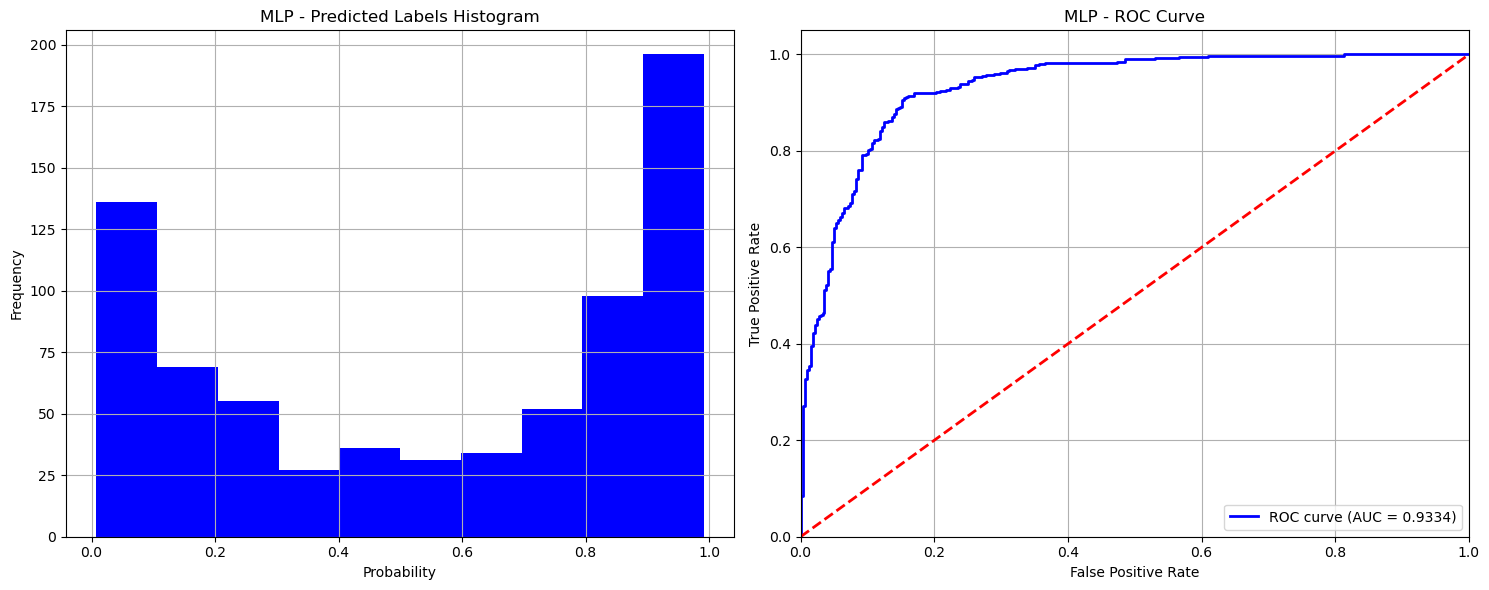

In [5]:
from sklearn.neural_network import MLPClassifier

# Train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=5000, random_state=42)
mlp.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot predicted labels histogram
axes[0].hist(y_prob_mlp, color='b')
axes[0].set_title('MLP - Predicted Labels Histogram')
axes[0].set_xlabel('Probability')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot ROC curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
axes[1].plot(fpr_mlp, tpr_mlp, color='b', lw=2, label='ROC curve (AUC = %0.4f)' % auc_mlp)
axes[1].plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('MLP - ROC Curve')
axes[1].legend(loc="lower right")
axes[1].grid(True)

plt.tight_layout()
plt.show()